<a href="https://colab.research.google.com/github/snegi5/hello-github/blob/master/Module_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve,auc

import tensorflow as tf
import keras
from keras.models import Sequential#For building the Neural Network layer by layer
from keras.layers import Dense#To randomly initialize the weights to small numbers close to 0(But not 0)





import warnings
warnings.filterwarnings("ignore")
from google.colab import files



In [6]:
data = pd.read_csv('bank.csv')
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
143,144,15713483,Greeves,793,Spain,Male,52,2,0.00,1,1,0,159123.82,1
8931,8932,15761487,Yefimova,678,France,Female,55,5,0.00,1,0,1,196794.11,1
1580,1581,15793881,Mitchell,721,France,Female,35,6,118273.83,1,0,1,3086.89,0
1664,1665,15791991,Udinesi,773,France,Male,52,4,0.00,1,0,1,144113.42,0
4395,4396,15790324,Green,660,France,Female,20,6,167685.56,1,1,0,57929.90,0
1362,1363,15683841,Hamilton,555,Germany,Male,41,10,113270.20,2,1,1,185387.14,0
253,254,15694717,Ku,544,Germany,Male,37,2,79731.91,1,1,1,57558.95,0
2951,2952,15671655,Thorpe,763,Germany,Male,31,7,143966.30,2,1,1,140262.96,1
9290,9291,15634591,Saunders,850,France,Male,33,8,73059.38,1,1,1,186281.00,0
7319,7320,15762045,Gilchrist,474,Germany,Female,37,5,142688.57,2,1,1,110953.33,0


In [7]:
data.shape

(10000, 14)

* There are 10000 observations and 14 coumns in the data set.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* we can see that there are no null values in the data.
* Surname, Geography and Gender are only 3 object(String) datatypes.
* Also, features like Rownumber, CustomerId and Surname are not relevant as these are unique id's and customer last name.

##### Dropping RowNumber, CustomerId and Surname.

In [9]:
# dropping unneccessary columns.
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6722,662,France,Male,29,5,147092.65,1,1,0,10928.30,0
1620,712,Germany,Male,43,1,141749.74,2,0,1,90905.26,0
3894,595,Spain,Male,37,2,157084.99,1,1,0,134767.13,0
628,649,France,Male,47,1,0.00,2,1,1,145593.85,0
6220,807,France,Male,33,10,101952.97,2,1,0,178153.65,0


##EDA

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


* Mean and Median CreditScore are also same aroung 650.
* Age is between the range from 18 to 92.it looks their are outlier in the age.
* Tenure is between 0 to 10, with mean and median close to 5. There are customer in the bank with less than 1 year of tenure.
* 25% of the customer has 0 Balance where as balance for top 25% of the customer is between 127644.2400 and 250898.09.
* 50% of the customer has only 1 product with the bank.
* 25% of the customer does not have a credit card where as other 75% of the customer has only 1 credit card.
* 25% of the customer are not active member, remaining 75% are active member.
* minimum estimayed salry is only 11.58. 50% of the customer earns less than 51002.11.



### Checking if dataset is balanced or not.

In [17]:
#checking the percentage of each class in the dataset
(data.Exited.value_counts())/(data.Exited.count())


0    0.7963
1    0.2037
Name: Exited, dtype: float64

* As we can see data set is not balanced, 20%(2037) of the customer have left the bank out of 10000 observations.

### Bivariate analysis

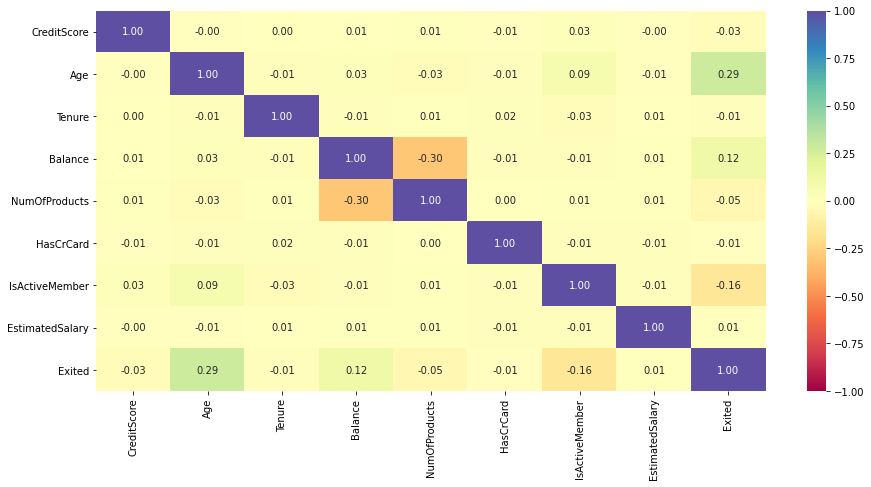

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* There is some week correlation between Exited and Age and between Exited and Balance.
* There is also some week negative correlation between Exited and IsActiveMember and between Balance and Balance and NumberOfProducts.

In [7]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Exited'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of an Exited Customer')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of an Existing Customer')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Exited')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Exited - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

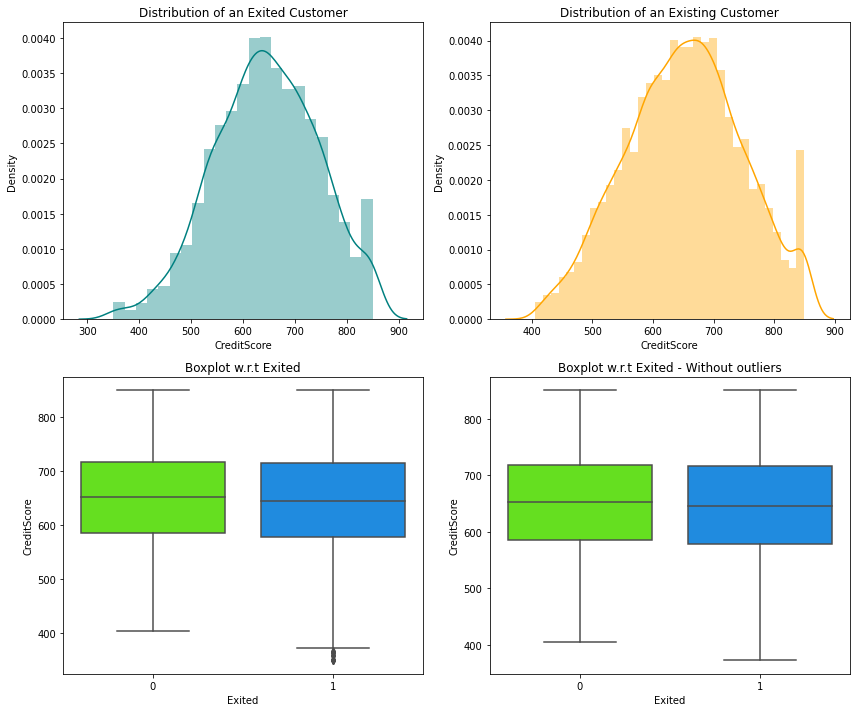

In [29]:
plot('CreditScore')

In [18]:
# one hot encoding for Geography.
data = pd.get_dummies(data, columns=['Geography','Gender'],drop_first=True)
data.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7655,748,38,4,115221.36,1,0,1,70956.75,0,0,0,1
4088,755,40,2,137430.82,2,0,0,176768.59,0,1,0,1


In [19]:
X=data.drop(columns='Exited')
y=data['Exited']

X.shape

(10000, 11)

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Feature Scaling
X_train.sample(2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#### Checking if the split data set is balanced or not.


In [42]:
print("Train data Value count")
print(y_train.value_counts())

print("\nTrain data class percentage")
print((y_train.value_counts())/y_train.count())

print("\nTest data Value count")
print(y_test.value_counts())

print("\nTest data class percentage")
print((y_test.value_counts())/y_test.count())


Train data Value count
0    6378
1    1622
Name: Exited, dtype: int64

Train data class percentage
0    0.79725
1    0.20275
Name: Exited, dtype: float64

Test data Value count
0    1585
1     415
Name: Exited, dtype: int64

Test data class percentage
0    0.7925
1    0.2075
Name: Exited, dtype: float64


##### Data is splitted evenly in the original % of 20 and 80.

In [11]:
model = Sequential()

model.add(Dense(units = 16, activation = 'relu', input_dim = 11))

model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))



In [100]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])

In [101]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [102]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 2ms/step - loss: 0.3337 - auc: 0.8650 - val_loss: 0.3528 - val_auc: 0.8473
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3321 - auc: 0.8664 - val_loss: 0.3566 - val_auc: 0.8467
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3307 - auc: 0.8674 - val_loss: 0.3550 - val_auc: 0.8461
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3301 - auc: 0.8678 - val_loss: 0.3503 - val_auc: 0.8480
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3292 - auc: 0.8681 - val_loss: 0.3510 - val_auc: 0.8490
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3288 - auc: 0.8693 - val_loss: 0.3542 - val_auc: 0.8484
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3272 - auc: 0.8712 - val_loss: 0.3496 - val_auc: 0.8483
Epoch 8/10
427/427 [==============================] - 1s 2ms/step - loss: 0.

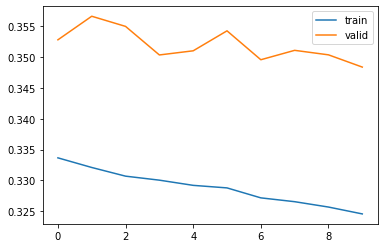

In [103]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [104]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3383 - auc: 0.8644


In [105]:
print(score)

[0.3382563591003418, 0.8644250631332397]


In [106]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

NameError: ignored

In [107]:
hist

,loss,auc,val_loss,val_auc,epoch
0,0.333668,0.865004,0.352793,0.847350,0
1,0.332108,0.866405,0.356612,0.846739,1
2,0.330702,0.867360,0.354968,0.846055,2
3,0.330054,0.867816,0.350341,0.848018,3
4,0.329212,0.868112,0.351012,0.849049,4
5,0.328800,0.869342,0.354249,0.848375,5
6,0.327185,0.871204,0.349565,0.848334,6
7,0.326565,0.871037,0.351088,0.849653,7
8,0.325697,0.871901,0.350359,0.848502,8
9,0.324584,0.873207,0.348375,0.850805,9


In [108]:

pred_prob=list()
for i in model.predict(X_train):
  pred_prob.append(i[0])

  

In [109]:
#model.predict(X_train)
df= pd.DataFrame()
df['flg']=y_train
df['prob']=pred_prob


In [119]:
#ROC curve on train.


array([[0.03637034],
       [0.5276565 ],
       [0.10347819],
       ...,
       [0.08199   ],
       [0.01733774],
       [0.74942195]], dtype=float32)

####Optimal Threshold

In [121]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)




0.20149934


In [1]:
roc_auc_train = roc_auc_score(y_train, model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, model.predict(X_train))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

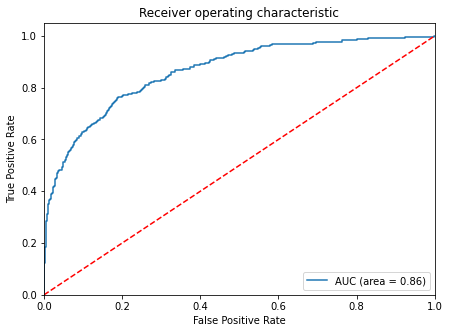

In [128]:
roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [112]:
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [113]:
scores_op = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.797125
Accuracy on test set :  0.7805
Recall on training set :  0.7665441176470589
Recall on test set :  0.7753086419753087
Precision on training set :  0.5018050541516246
Precision on test set :  0.4743202416918429
F1 on training set :  0.6065454545454546
F1 on test set :  0.5885660731021556
ROC-AUC Score on training set :  0.7857532146024239
ROC-AUC Score on test set :  0.7785634118967453


In [117]:
tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name=None, dtype=None,
    thresholds=None, multi_label=False, num_labels=None, label_weights=None,
    from_logits=False
)